In [17]:
import matplotlib.pyplot
import skimage.data
import numpy as np
import math
# Reading the image  
img =skimage.io.imread("/home/sneha/Downloads/dog.jpg")
# matplotlib.pyplot.imshow(img)

In [18]:
#padding function
def padding(image,size):
    for i in range(size):
        image=np.insert(image, 0,0,axis=0)
        image=np.insert(image,0,image.shape[1],axis=0)
        image=np.insert(image, 0,0,axis=1)
        image=np.insert(image,0,image.shape[0],axis=1)
    return image

In [19]:
#function will give you a filter of specified size
def filters(num_filter,width,height,depth):
    l1_filter = np.random.random_integers(-1,2,size=(num_filter,width,height,depth))
    return l1_filter
    
    

In [20]:
#calculating the dimension of output feature map
def out_dimension(image,filters,stride):
    r=(image.shape[0])-(filters.shape[1])
    t=(image.shape[1])-(filters.shape[2])
    out_size_x= int(math.floor(r/stride))+1
    out_size_y= int(math.floor(t/stride))+1
    out=np.zeros((out_size_x,out_size_y))
    return out

In [21]:
def relu(feature_map):
    #Preparing the output of the ReLU activation function.  
    relu_out = np.zeros(feature_map.shape)  
    for r in range(0,feature_map.shape[0]):  
        for c in range(0, feature_map.shape[1]):  
            relu_out[r][c] = max(feature_map[r][c], 0)  
    return relu_out

In [22]:
#convolving the filter over image and generating the output feature map
def convolution(image,filters,stride,pad_size,activation):
        count_i=0
        count_j=0
        image= padding(image,pad_size)
        matplotlib.pyplot.imshow(image)
        out_dim= out_dimension(image,filters,stride)
        for i in range(0,out_dim.shape[0]):
            count_j=0
            for j in range(0,out_dim.shape[1]):
                temp=image[i+count_i:(i+(filters.shape[1])+count_i),j+count_j:(j+(filters.shape[2])+count_j),:]
                temp_1=np.multiply(temp,filters)
                temp_1=temp_1.reshape(-1)
                z=np.sum(temp_1)
                out_dim[i][j]=z
                count_j=count_j+stride-1
            count_i=count_i+stride-1
        return out_dim
        if(activation=='relu'):
            out= relu(out_dim)
            return out


In [23]:
def pooling( relu_out, stride_size, pool_mat ):
    count_i=0
    count_j=0
    pool= out_dimension(relu_out,pool_mat,stride_size)
    for i in range(0,pool.shape[0]):
        count_j=0
        for j in range(0,pool.shape[1]):
            temp=relu_out[i+count_i:(i+(stride_size)+count_i),j+count_j:(j+(stride_size)+count_j)]
            temp_1=np.multiply(temp,pool_mat)
            temp_1=temp_1.reshape(-1)
            z=np.amax(temp_1)
            pool[i][j]=z
            count_j=count_j+stride_size-1
        count_i=count_i+stride_size-1
    return pool



/home/sneha/miniconda3/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(-1, 2 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sneha/miniconda3/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(-1, 2 + 1) instead
  


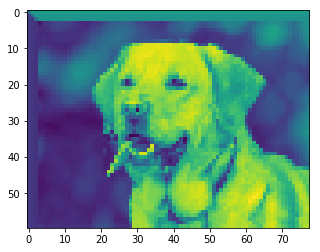

In [25]:
if __name__ == "__main__":
    image=img
    fil=filters(2,3,3,3)
    stride=3
    pad_size=10
    activation='relu'
    out= convolution(image,fil,stride,pad_size,activation)
    pool_mat= np.random.random_integers(-1,2,size=(1,2,2))
    p= pooling(out,2,pool_mat)
    matplotlib.pyplot.imshow(p)

    